# Trabalhando com texto para Machine Learning 

http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html


---



In [1]:
import numpy as np

## Carregando Dataset
“Twenty Newsgroups”: a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.

In [2]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

print("\n".join(twenty_train.data[0].split("\n")[:3]))
print("Category name:", twenty_train.target_names[twenty_train.target[0]])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
('Category name:', 'comp.graphics')


In [3]:
print(twenty_train.target[:20])
print(len(twenty_train.data))

[1 1 3 3 3 3 3 2 2 2 3 1 0 0 1 1 2 0 3 0]
2257


In [4]:
print("\n".join(twenty_train.data[10].split("\n")[:20]))

From: anasaz!karl@anasazi.com (Karl Dussik)
Subject: Re: Is "Christian" a dirty word?
Organization: Anasazi Inc Phx Az USA
Lines: 73

In article <Mar.25.03.53.08.1993.24855@athos.rutgers.edu> @usceast.cs.scarolina.edu:moss@cs.scarolina.edu (James Moss) writes:
>I was brought up christian, but I am not christian any longer.
>I also have a bad taste in my mouth over christianity.  I (in
>my own faith) accept and live my life by many if not most of the
>teachings of christ, but I cannot let myself be called a christian,
>beacuse to me too many things are done on the name of christianity,
>that I can not be associated with.  

A question for you - can you give me the name of an organization or a
philosophy or a political movement, etc., which has never had anything
evil done in its name?  You're missing a central teaching of Christianity -
man is inherently sinful.  We are saved through faith by grace.  Knowing
that, believing that, does not make us without sin.  Furthermore, not all
who c

## Tokenização e filtragem de *stop words*

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features=30000)
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 30000)

In [6]:
print count_vect.vocabulary_.get(u'algorithm')

4185


In [7]:
print len(count_vect.stop_words_)
print list(count_vect.stop_words_)[0:10]

5788
[u'hintze_matthew', u'narcotic', u'jihad', u'pantheistic', u'pigged', u'eligible', u'electricity', u'milchstrasse_', u'fingernails', u'lore']


## Term Frequencies (TF)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 30000)

In [9]:
print X_train_tf.data[0:10]

[ 0.0758098   0.0758098   0.0758098   0.0758098   0.0758098   0.15161961
  0.15161961  0.0758098   0.0758098   0.0758098 ]


## Term Frequencies times Inverse Document Frequencies

In [10]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 30000)

In [11]:
print X_train_tfidf.data[0:10]

[ 0.01711196  0.13739342  0.32028     0.1272544   0.12040755  0.19989786
  0.39136536  0.01711196  0.21970557  0.07583636]


## Treinando um classificador

In [12]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [13]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


## Entendendo os dados

In [14]:
print X_new_counts
print list(X_new_tfidf.data)

  (0, 13578)	1
  (0, 15370)	1
  (0, 16597)	1
  (1, 12691)	1
  (1, 15370)	1
  (1, 18574)	1
  (1, 18604)	1
  (1, 26356)	1
[0.80940105623895797, 0.25589426468464183, 0.52857171269447023, 0.12120651309423221, 0.81675122738700046, 0.17466136107219979, 0.1364782900331992, 0.51874222793540381]


In [15]:
print 'god:', count_vect.vocabulary_.get(u'god')
print 'love:', count_vect.vocabulary_.get(u'love')
print 'OpenGL:', count_vect.vocabulary_.get(u'OpenGL') 
print 'opengl:', count_vect.vocabulary_.get(u'opengl') 

god: 13578
love: 16597
OpenGL: None
opengl: 18604


In [16]:
print 'gpu:', count_vect.vocabulary_.get(u'gpu') 
print 'gpu in stop words?', 'gpu' in count_vect.stop_words_

gpu: None
gpu in stop words? True


## Construindo um *Pipeline*

In [17]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

In [18]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...False,
         use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Testando classificador

In [19]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target) 

0.83488681757656458

In [20]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

           avg / total       0.88      0.83      0.84      1502



In [21]:
cm = metrics.confusion_matrix(twenty_test.target, predicted)

In [22]:
cm

array([[192,   2,   6, 119],
       [  2, 347,   4,  36],
       [  2,  11, 322,  61],
       [  2,   2,   1, 393]])

([<matplotlib.axis.YTick at 0x7fa5c40e5710>,
 <a list of 4 Text yticklabel objects>)

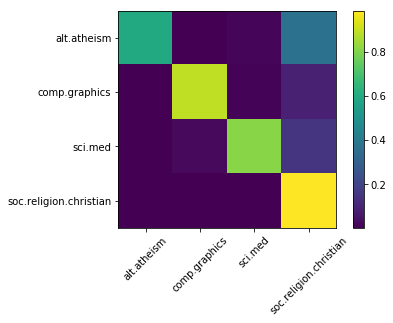

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm)
plt.colorbar()

classes = [twenty_train.target_names[t] for t in np.unique(twenty_test.target)]

plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)